In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import display, Latex
from utils import *

import warnings
warnings.filterwarnings('ignore')

init_printing(use_latex='mathjax')

<h1><center>Koch Meinhardt model</center> </h1>

## Introduction

In this section, we will apply the result of the previous section on the Brusselator model. To speed up the calculation, we will use the _sympy_ library that provides the symbolic computation for Python. This way, we can derive the result quickly and fast.
In each cell, we might use some commands from _sympy_ (explained by a comment) or the following command:

__lprint__: Print a string into the ouput that has one or placeholders for latex scripts.

Below are some examples

In [2]:
lprint(lprint("The fraction is {0}={1}:", r"\lambda^*", r"\frac{B-1-A^2}{2}"))
lprint(r"$This \, is \, \pi \, in \,$ sympy: {0}", pi)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Brusselator PDEs

> The Brusselator PDEs for two species are
<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u +  \rho_u \frac{u^2 v}{1 + \kappa_u u^2} - \mu_u u + \sigma_u$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v - \rho_v\frac{u^2 v}{1 + \kappa_u u^2} + \sigma_v$</center></h3>

for diffusion constants $D_u$, $D_v$, and model parameters $\rho_u, \rho_V, \kappa_u, \mu_u, \sigma_u, \sigma_v$.
Therefore, the kinetic terms are

<h3><center>$f(u,v) = \rho_u \frac{u^2 v}{1 + \kappa_u u^2} - \mu_u u + \sigma_u$</center></h3>
<h3><center>$g(u,v) = - \rho_v\frac{u^2 v}{1 + \kappa_u u^2} + \sigma_v$</center></h3>

The dimensionless version transformed as

<h3><center>$\frac{\partial u^*}{\partial t^*} =  (\partial_{x^* x^*} + \partial_{y^* y^*}) u^* + \rho^*_u \frac{(u^*)^2 v^*}{1 + \kappa_u (u^*)^2} - u^* + 1$</center></h3>
<h3><center>$\frac{\partial v^*}{\partial t^*} =  D (\partial_{x^* x^*} + \partial_{y^* y^*}) v^*- \rho^*_v \frac{(u^*)^2 v^*}{1 + \kappa_u^* (u^*)^2} + 1$</center></h3>

<h3><center>$  u = (\sigma_u/\mu_u) u^*$</center></h3>
<h3><center>$  v = (\sigma_v/\mu_u) v^*$</center></h3>
<h3><center>$  t = t^*/ \mu_u$</center></h3>
<h3><center>$  x = \sqrt{\frac{D_u}{\mu_u}} x^*$</center></h3>
<h3><center>$  y = \sqrt{\frac{D_u}{\mu_u}} y^*$</center></h3>
<h3><center>$  D = \frac{D_v}{D_u}$</center></h3>
<h3><center>$  \rho_u = (\frac{\mu_u^3}{\sigma_u \sigma_v}) \rho^*_u$</center></h3>
<h3><center>$  \rho_v = (\frac{\mu_u^3}{\sigma_u^2}) \rho^*_v$</center></h3>
<h3><center>$  \kappa_u = (\frac{\mu_u^2}{\sigma_u^2}) \kappa_u^*$</center></h3>

To start with __sympy__, we must define the list of parameters that will be used as symbol.

In [5]:
(rho_u, rho_v, 
 kappa_u, D, u, v, k

)= symbols('rho_u, rho_v, kappa_u,  D, u, v, k', real=True)
#k = symbols('k', integer=True)

Next, we can define the kinetic terms, $f(u, v)$ and $g(u, v)$ for parameters $(D, \rho_u, \rho_V, \kappa_u)$

In [7]:
# define kinteic terms symbolically in sympy
f = rho_u * u**2 * v / (1.0 + kappa_u * u**2) -  u + 1
g = -rho_v * u**2 * v / (1.0 + kappa_u * u**2) + 1
# print their form
lprint("$f(u,v) = $ {0}", f)
lprint("$g(u,v) = $ {0}",g)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

and mixing them as a vector is using _Matrix_ method like

In [8]:
Kinetic = Matrix(
    [[f], 
     [g]])
lprint(r"$\boldsymbol{f}(u, v) = $ {0}", Kinetic)

<IPython.core.display.Latex object>

After that, we need to find the steady state solutions of the system without diffusion by solving the following nonlinear equations

<center>$f(u,v) = -  u + \frac{\rho_{u} u^{2} v}{\kappa_{u} u^{2} + 1.0} + 1 = 0$</center>
<center>$g(u,v) = - \frac{\rho_{v} u^{2} v}{\kappa_{u} u^{2} + 1.0} + 1
 = 0$</center>

The solution of the above equations, dented by $u^*$ and $v^*$, is such that
<center>$f(u^*, v^*) = 0$</center>
<center>$g(u^*, v^*) = 0$</center>

In _sympy_ it we can solve the system symbolicly by using the _solve_ function

In [9]:
# finding the steady state of the system, which
# is the solution of the system with respect to u and v
u_star, v_star = solve(Kinetic, (u, v))[0]
lprint("$u^* = $ {0}", u_star)
lprint("$v^* = $ {0}", v_star)
#print("simplify them manually")
#u_star = (rho_u*sigma_v/(mu_u*rho_v)) + (sigma_v/mu_u)
#v_star = kappa_u* sigma_v/rho_v + sigma_v * rho_v * mu_u**2/(rho_u * sigma_v + rho_v * sigma_u)**2

#lprint("$u^* = $ {0}", u_star)
#lprint("$v^* = $ {0}", v_star)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Next, to linearise the PDE system, we must derive the Jacobian of $(f, g)$ that is evaluated at $(u^*, v^*)$ 

In [10]:
# Find the jacobian of the vectorised kinetic terms w.r.t. u and v
J_0 = Kinetic.jacobian([u, v])
# Print the jacobian
lprint(r"$J_0= \frac{\partial \boldsymbol{f}_i}{\partial u_j} =$ {0} ", J_0)
# Evaluate the jacobian at the stationary solution
J_0 = J_0.subs([(u, u_star), (v, v_star)])
# print the jacobian at the stationary solution
lprint("$J_0|_{(u^*, v^*)} =$ {0}", J_0)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Eigenvalues of the resulting matrix in terms of parameters $D, \rho_u, \rho_V, \kappa_u$ derives by calling _eigenvals_ function

In [11]:
# Deriving eigenvalues of the jacobian in terms of parameter A and B
λ_0_1, λ_0_2 =  list(J_0.eigenvals().keys())
lprint("$\lambda^{(0)}_1 =$ {0}", λ_0_1)
lprint("$\lambda^{(0)}_2 =$ {0}", λ_0_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We can find the region of the $(D, \rho_u, \rho_V, \kappa_u)$ plan where both $\lambda_1$ and $\lambda_2$ are negative (Turing stability) or directly use the inequalities we saw in the previous section.
Here, we try both of them and get exactly the same result.

In [12]:
# Find the trace and determinant of J_0 symbolically
cond_1 = J_0.trace()
cond_2 = J_0.det()
lprint(r"Condition 1: {0} $< 0$", cond_1)
lprint(r"Condition 2: {0} $> 0$", cond_2)
# convert the symbolic trace and determinants to numpy functions
cond_1_f = lambdify([rho_u, rho_v, kappa_u], cond_1, modules='numpy')
cond_2_f = lambdify([rho_u, rho_v, kappa_u], cond_2, modules='numpy')
# convert the symbolic lambda_2 to a numpy function
λ_0_2_f = lambdify([rho_u, rho_v, kappa_u], λ_0_2, modules='numpy')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

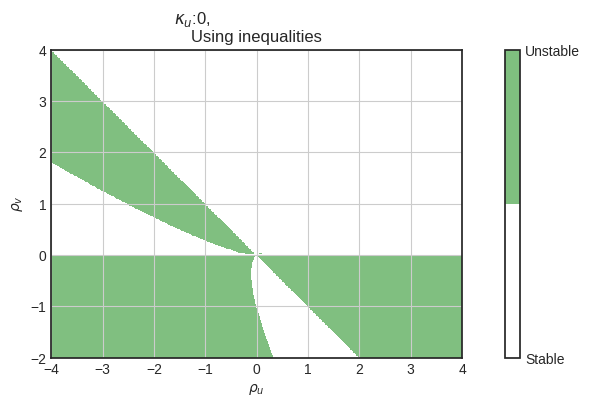

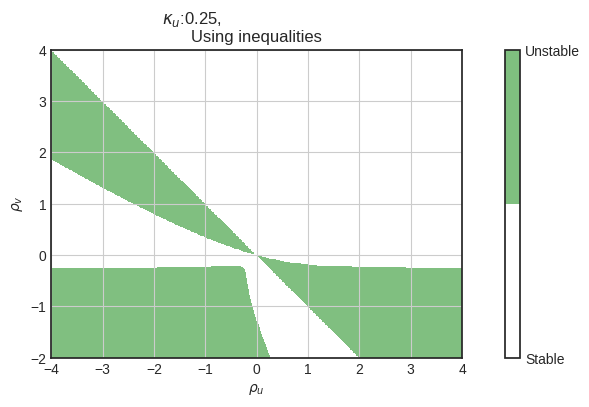

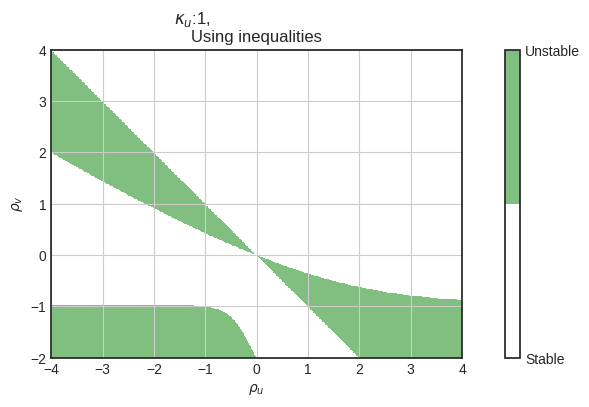

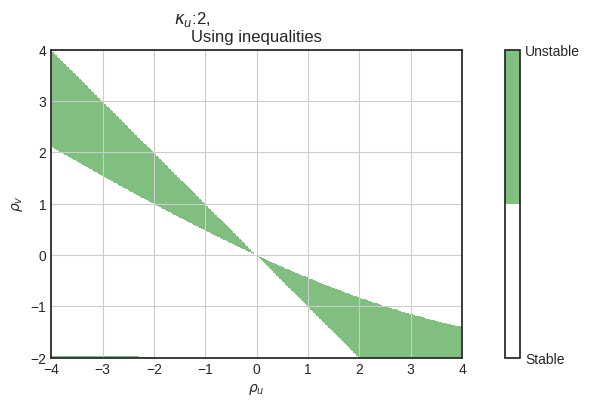

In [14]:
# Create a meshgrid [-4, 4]x[-2, 4] for (rho_u, rho_v) domain
L = 4
rho_u_size = 400
rho_v_size = 400
rho_u_axis = L * np.linspace(-1, 1, rho_u_size)
rho_v_axis = L * np.linspace(-.5, 1, rho_v_size)
rho_u_grid, rho_v_grid = np.meshgrid(rho_u_axis, rho_v_axis, sparse=False)


#kappa_u_val = 0.25
#mu_u_val = 1.0
#sigma_u_val = 0.0
#sigma_v_val = 1.0

for kappa_u_val in [0, .25, 1, 2]:
    # Plotting
    fig = plt.figure(figsize=(11,4))
    plt.suptitle(r"$\kappa_u$:" f"{kappa_u_val}, ")
    plt.style.use('seaborn-white')
#                 ax = fig.add_subplot(121)
#                 ax.set_title("Using eigenvalues")


#                 # Numerically calculate the largest eigenvalues
#                 domain = λ_0_2_f(np.complex64(rho_u_grid), 
#                                  np.complex64(rho_v_grid),
#                                 kappa_u_val,
#                                 mu_u_val,
#                                 sigma_u_val,
#                                 sigma_v_val)
#                 # plot the domain by using zero as the levelset
#                 plot_two_levels(ax, np.real(domain), [-L, L, -L/2, L], r"$\rho_u$", r"$\rho_v$", 0, ['Stable', 'Unstable'])

    ax = fig.add_subplot(111)
    ax.set_title("Using inequalities")

    # Numerically calculate the values of the condition one
    domain = cond_1_f(np.complex64(rho_u_grid), 
                     np.complex64(rho_v_grid),
                    kappa_u_val)
    # plot the domain by using zero as the levelset
    plot_two_levels(ax,np.real(domain), [-L, L, -L/2, L], r"$\rho_u$", r"$\rho_v$", 0, ['Stable', 'Unstable'])
    #plt.tight_layout()
    plt.show()

Including the diffusion, the matrix $\boldsymbol{J}$ defines as
<center>$\boldsymbol{J} = \boldsymbol{J_0} - k^2 \boldsymbol{D}$</center>
and we can use _sympy_ to find its egenvalues symbolically as follows:

In [15]:
# Define J 
J = J_0 - Matrix([[k**2,     0       ], 
                  [0,        D*k**2]])
# print its form
lprint(r"$\boldsymbol{J}$ = {0}", J)
# Find its eigenvalues
#λ_1, λ_2 =  list(J.eigenvals().keys())
#lprint("$\lambda_1 = $ {0}", λ_1)
#lprint("$\lambda_2 = $ {0}", λ_2)

<IPython.core.display.Latex object>

In [16]:
f_u = J_0[0, 0]
f_v = J_0[0, 1]
g_u = J_0[1, 0]
g_v = J_0[1, 1]

lprint(r"$f_u$={0}", f_u)
lprint(r"$f_v$={0}", f_v)
lprint(r"$g_u$={0}", g_u)
lprint(r"$g_v$={0}", g_v)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### combining all the conditions together

Previously, we saw that for the Brusselator model
<h4><center>$det(\boldsymbol{J_0}) = f_u g_v - f_v g_u = -A^2 < 0$</center></h4>

is always true. So, it remains three inequalities that together determine the Turing space of parameters:

<h3><center>$f_u + g_v < 0$,</center></h3>
<h4><center>$ D_v f_u + D_u g_v > 0$,</center></h4>
<h4><center>$(D_v f_u + D_u g_v)^2 > 4D_u D_v (f_u g_v - f_v g_u)$,</center></h4>

However, these inequalites depends on four parameters, namely $ \rho_u, \rho_v, \kappa_u, D, D$, which makes the plotting of the Turning space very hard. So, we introduce the ratio of diffusion constants as $\delta = D_u/D_v$, and then for $D_u, D_v > 0$
<h4><center>$f_u + g_v < 0$,</center></h4>
<h4><center>$ f_u + \delta g_v > 0$,</center></h4>
<h4><center>$(f_u + \delta g_v)^2 > 4 \delta (f_u g_v - f_v g_u)$,</center></h4>

This set of inequalities have only three independnet parameters, and by fixing $\delta$, we can find the Turing space on $( \rho_u, \rho_v, \kappa_u, \mu_u, \sigma_u, \sigma_v)$ plane.

Let us first define $\delta$ and the new two inequalities symbolicly, and turn them to a numpy function.

In [18]:
#δ = symbols("δ", positive=True)

cond_3 = D * f_u + g_v
cond_4 = D * cond_3**2 - 4 * J_0.det()
lprint(r"Condition 3: {0}$ > 0$ ", cond_3)
lprint(r"Condition 4: {0}$ > 0$ ", cond_4)
# convert the conditions to numpy functions
cond_3_f = lambdify([rho_u, rho_v, kappa_u, D], cond_3, modules='numpy')
cond_4_f = lambdify([rho_u, rho_v, kappa_u, D], cond_4, modules='numpy')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Using the function of all three conditions (inequalities), the following code iterates on a list of $D \in \{1, 2, 4, 8, 16, 32, 64, 100\}$ for $(\rho_u, \rho_v) \in [-4, 4]x[-2, 4]$ plane, and then calculate the three conditions for each $(D, \rho_u, \rho_v)$. Note that the results are True/False values that a __bitwise AND__ operation on all of them is True, whenever all are satisfied and True. Finally, the intersected domain (base on __bitwise AND__ operation) is plotted for the given $\delta$.

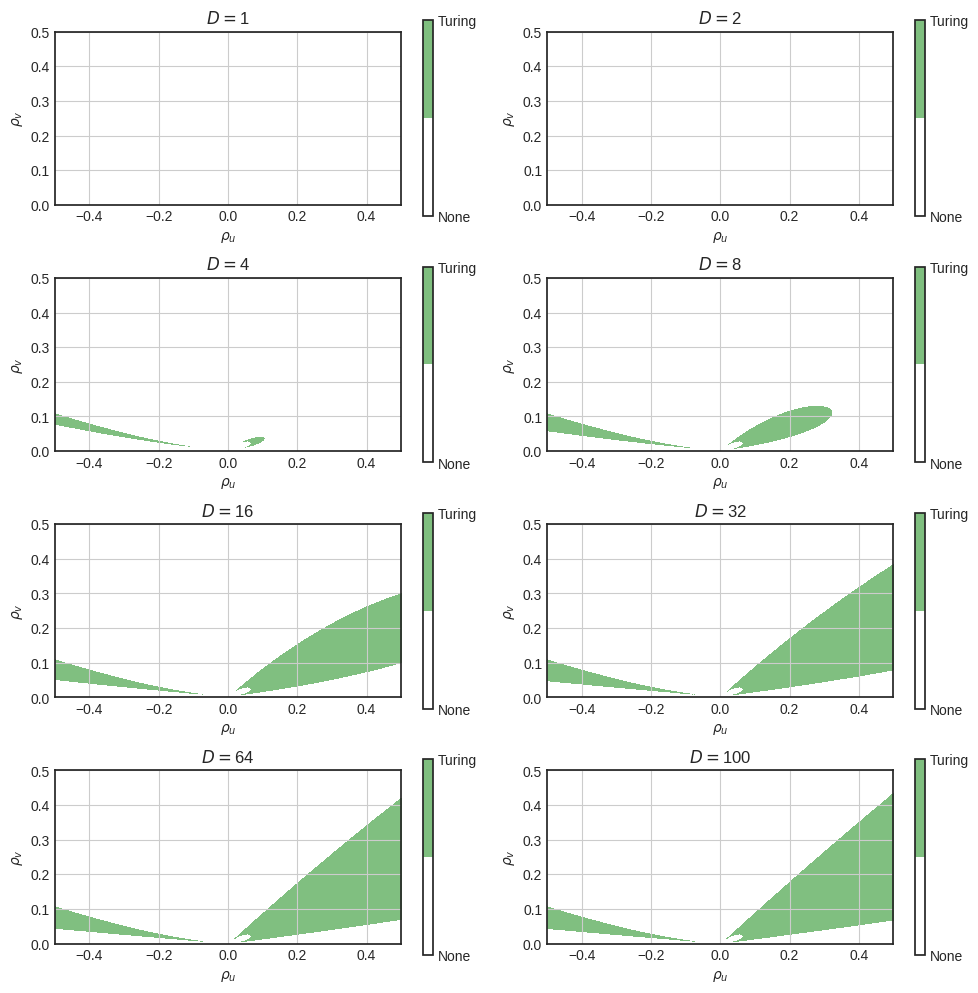

In [33]:
# Create a meshgrid [-4, 4]x[-2, 4] for (A, B) domain
L = 0.5
rho_u_size = 1000
rho_v_size = 1000
rho_u_axis = L * np.linspace(-1, 1, rho_u_size)
rho_v_axis = L * np.linspace(0, 1, rho_v_size)
rho_u_grid, rho_v_grid = np.meshgrid(rho_u_axis, rho_v_axis, sparse=False)

kappa_u_val=0.01

D_values = np.array([1, 2, 4, 8, 16, 32, 64, 100])
# Plotting
fig = plt.figure(figsize=(10,10))
plt.style.use('seaborn-white')

for i, D_val in enumerate(D_values):
    ax = fig.add_subplot(4, 2, i+1)
    ax.set_title(r"$D=$" f"{D_val}")
    # Numerically calculate the values of the conditions
    domain = cond_3_f(rho_u_grid,
                      rho_v_grid,
                      kappa_u_val,                      
                      D_val)
    domain[domain > 0] = True
    domain[domain <= 0] = False
    # 
    domain2 = cond_4_f(rho_u_grid,
                      rho_v_grid,
                      kappa_u_val,                      
                      D_val)
    domain2[domain2 > 0] = True
    domain2[domain2 <= 0] = False
    #        
    domain_intersect = np.bool8(domain) & np.bool8(domain2)
    #
    domain3 = cond_1_f(rho_u_grid,
                       rho_v_grid,
                       kappa_u_val)    
    domain3[domain3 >= 0] = False
    domain3[domain3 < 0] = True
    domain_intersect = domain_intersect & np.bool8(domain3)
    # plot the domain by using zero as the levelset
    plot_two_levels(ax, np.float16(domain_intersect), 
                    [-L, L, 0, L], 
                    r"$\rho_{u}$", r"$\rho_{v}$", 
                    0, 
                    ['None', 'Turing'])

plt.tight_layout()
plt.show()

# Finding the Turing space for diffusion constants that are different for around 25%

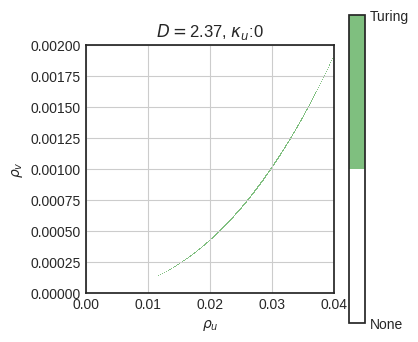

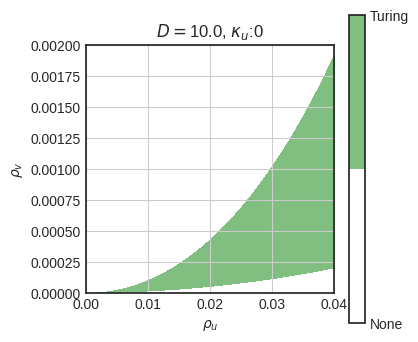

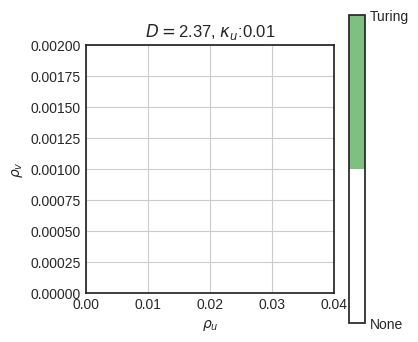

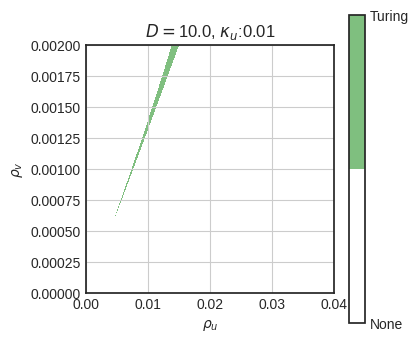

In [64]:
# Create a meshgrid [-4, 4]x[-2, 4] for (A, B) domain

L_1 = .04
L_2 = .002
rho_u_size = 2000
rho_v_size = 2000
rho_u_axis = L_1 * np.linspace(0, 1, rho_u_size)
rho_v_axis = L_2 * np.linspace(0, 1, rho_v_size)
rho_u_grid, rho_v_grid = np.meshgrid(rho_u_axis, rho_v_axis, sparse=False)

D_values = np.array([2.37, 10])
# Plotting


for kappa_u_val in [0, .01]:
    for i, D_val in enumerate(D_values):
        fig = plt.figure(figsize=(4,4))
        plt.style.use('seaborn-white')
        ax = fig.add_subplot(1, 1, 1)#fig.add_subplot(3, 2, i+1)
        ax.set_title(r"$D=$" f"{D_val}, "
                     r"$\kappa_u$:" f"{kappa_u_val}")
        # Numerically calculate the values of the conditions
        domain = cond_3_f(rho_u_grid,
                          rho_v_grid,
                          kappa_u_val,
                          D_val)
        domain[domain > 0] = True
        domain[domain <= 0] = False
        # 
        domain2 = cond_4_f(rho_u_grid,
                          rho_v_grid,
                          kappa_u_val,
                          D_val)
        domain2[domain2 > 0] = True
        domain2[domain2 <= 0] = False
        #        
        domain_intersect = np.bool8(domain) & np.bool8(domain2)
        #
        domain3 = cond_1_f(rho_u_grid,
                           rho_v_grid,
                           kappa_u_val)    
        domain3[domain3 >= 0] = False
        domain3[domain3 < 0] = True
        domain_intersect = domain_intersect & np.bool8(domain3)
        # plot the domain by using zero as the levelset
        plot_two_levels(ax, np.float16(domain_intersect), 
                        [0, L_1, 0, L_2], 
                        r"$\rho_{u}$", r"$\rho_{v}$", 
                        0, 
                        ['None', 'Turing'],
                        aspect=L_1/L_2)
        #


        #plt.tight_layout()
        plt.show()

In [65]:
def domain_profile(rho_u_val,
                   rho_v_val,
                   kappa_u_val,
                   D_val):
    # Numerically calculate the values of the conditions
    domain = cond_3_f(rho_u_val,
                      rho_v_val,
                      kappa_u_val,
                      D_val)
    domain[domain > 0] = True
    domain[domain <= 0] = False
    # 
    domain2 = cond_4_f(rho_u_val,
                      rho_v_val,
                      kappa_u_val,
                      D_val)
    domain2[domain2 > 0] = True
    domain2[domain2 <= 0] = False
    #        
    domain_intersect = np.bool8(domain) & np.bool8(domain2)
    #
    domain3 = cond_1_f(rho_u_val,
                       rho_v_val,
                       kappa_u_val)    
    domain3[domain3 >= 0] = False
    domain3[domain3 < 0] = True
    domain_intersect = domain_intersect & np.bool8(domain3)
    
    return np.float16(domain_intersect)    

def plot_profile(ax,
                 domain_intersect,
                 title,
                 L_1,
                 L_2,
                 x_label,
                 y_label):
    ax.set_title(title)    
    # plot the domain by using zero as the levelset
    plot_two_levels(ax, domain_intersect, 
                    [0, L_1, 0, L_2], 
                    x_label, y_label, 
                    0, 
                    ['None', 'Turing'],
                    aspect=L_1/L_2)

In [66]:
0.4 * np.linspace(0, 1, 8+1)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ])

In [73]:
# Create a meshgrid [-4, 4]x[-2, 4] for (A, B) domain

L_1 = 1
L_2 = 1
L_3 = .2
L_4 = 1.6

x_size = 100
y_size = 100
z_size = 100
w_size = 8
x_axis = L_1 * np.linspace(0, 1, x_size)
y_axis = L_2 * np.linspace(0, 1, y_size)
z_axis = L_3 * np.linspace(0, 1, z_size+1)
w_axis = L_4 * np.linspace(0, 1, w_size+1)

#rho_u_grid, rho_v_grid = np.meshgrid(x_axis, y_axis, sparse=False)
rho_u_grid, rho_v_grid, kappa_u_val = np.meshgrid(x_axis, y_axis, z_axis, sparse=False)
#rho_u_grid, rho_v_grid, sigma_u_grid = np.meshgrid(x_axis, y_axis, z_axis, sparse=False)

D_values = np.array([5, 10, 100])
# Plotting



In [74]:
np.prod(rho_u_grid.shape)

1010000

In [75]:

domain = domain_profile(rho_u_grid,
                        rho_v_grid,
                        kappa_u_val,
                        D_val)

In [76]:
domain.shape

(100, 100, 101)

ValueError: num must be 1 <= num <= 8, not 9

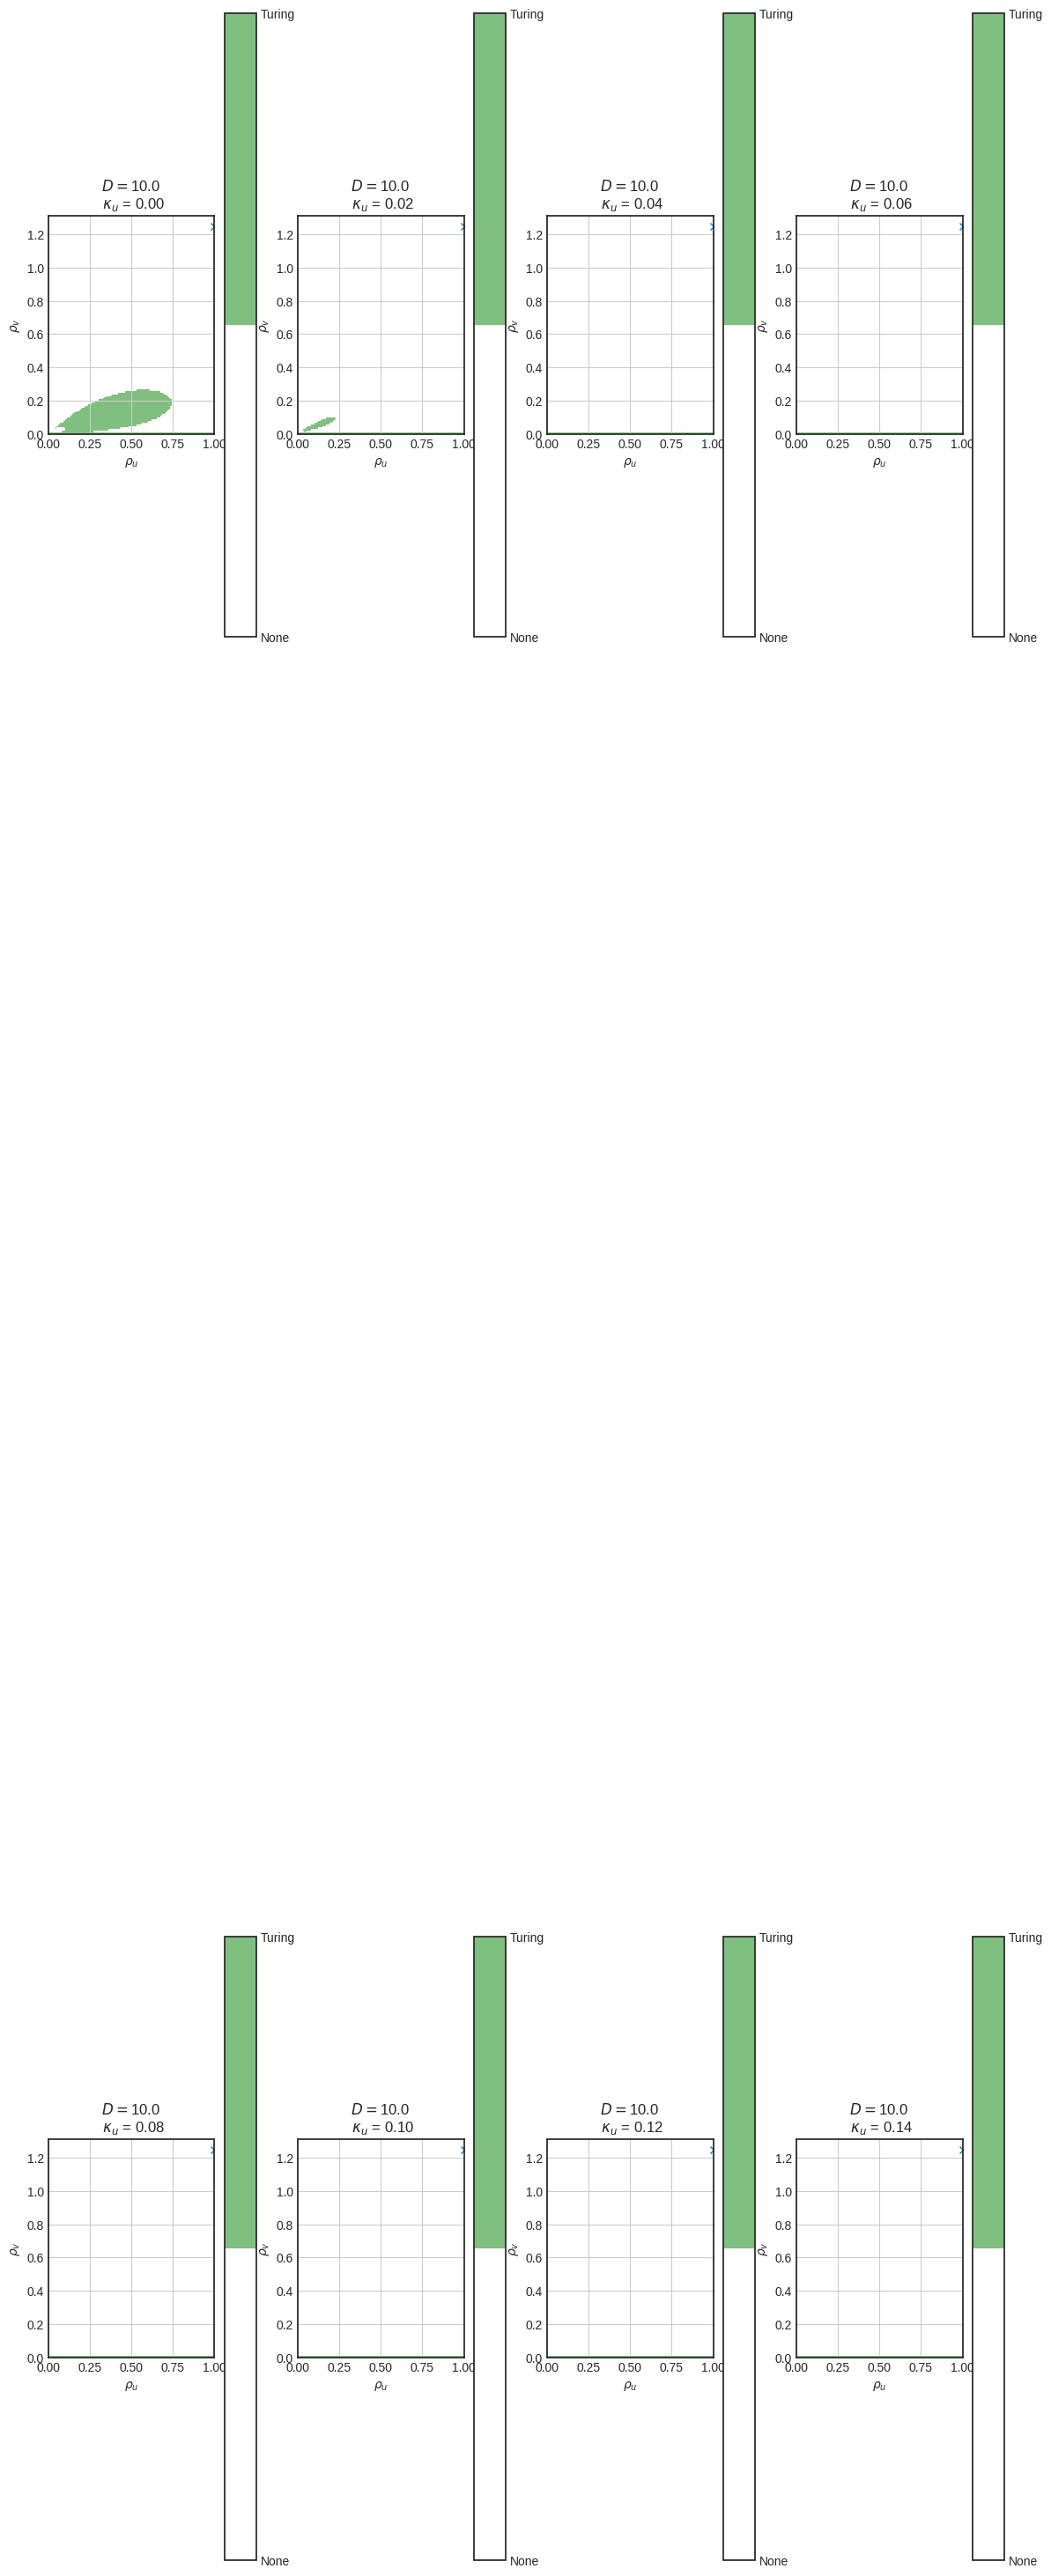

In [82]:
fig = plt.figure(figsize=(14,52))
plt.style.use('seaborn-white')


title=r"$D=$" f"{D_val} "
                 

steps_i = z_size//10
index = 1
for index_i in range(steps_i):
    ax = fig.add_subplot(steps_i//4, 4, index)
    i = 10*index_i #* (z_size//steps_i)
    plot_profile(ax,
             domain[:, : , i],
             title + "\n " r"$\kappa_u$ = " f"{z_axis[i]:.2f}",
             L_1,
             L_2,
             r"$\rho_{u}$",
             r"$\rho_{v}$")
    ax.plot(1, 1.25, 'x')
    index += 1



plt.tight_layout()
plt.show()

In [92]:
print(kappa_u_val,
       mu_u_val,
       sigma_u_val,
       sigma_v_val)

0 1.0 1 0.1


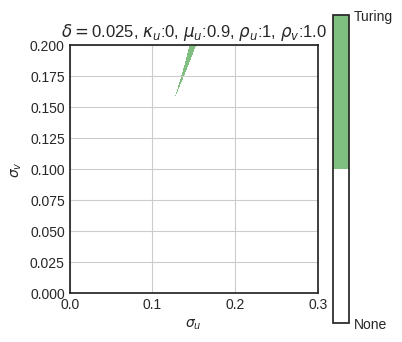

In [184]:
# Create a meshgrid [-4, 4]x[-2, 4] for (A, B) domain

L_1 = .3
L_2 = .2
rho_u_size = 1000
rho_v_size = 1000
rho_u_axis = L_1 * np.linspace(0, 1, rho_u_size)
rho_v_axis = L_2 * np.linspace(0, 1, rho_v_size)
rho_u_grid, rho_v_grid = np.meshgrid(rho_u_axis, rho_v_axis, sparse=False)

δ_values = np.array([.1, .01])
# Plotting


kappa_u_val=0
mu_u_val=0.9
sigma_u_val=1
sigma_v_val=1.0
δ_val=1/40.0
fig = plt.figure(figsize=(4,4))
plt.style.use('seaborn-white')
ax = fig.add_subplot(1, 1, 1)#fig.add_subplot(3, 2, i+1)
ax.set_title(r"$\delta=$" f"{δ_val}, "
             r"$\kappa_u$:" f"{kappa_u_val}, " 
         r"$\mu_u$:" f"{mu_u_val}, "
         r"$\rho_u$:" f"{sigma_u_val}, "
         r"$\rho_v$:" f"{sigma_v_val}")
# Numerically calculate the values of the conditions
domain = cond_3_f(sigma_u_val,
                  sigma_v_val,
                  kappa_u_val,
                  mu_u_val,
                  rho_u_grid,
                  rho_v_grid,                  
                  δ_val)
domain[domain > 0] = True
domain[domain <= 0] = False
# 
domain2 = cond_4_f(sigma_u_val,
                  sigma_v_val,
                  kappa_u_val,
                  mu_u_val,
                  rho_u_grid,
                  rho_v_grid,
                  δ_val)
domain2[domain2 > 0] = True
domain2[domain2 <= 0] = False
#        
domain_intersect = np.bool8(domain) & np.bool8(domain2)
#
domain3 = cond_1_f(sigma_u_val,
                  sigma_v_val,
                  kappa_u_val,
                  mu_u_val,
                  rho_u_grid,
                  rho_v_grid,)    
domain3[domain3 >= 0] = False
domain3[domain3 < 0] = True
domain_intersect = domain_intersect & np.bool8(domain3)
# plot the domain by using zero as the levelset
plot_two_levels(ax, np.float16(domain_intersect), 
                [0, L_1, 0, L_2], 
                r"$\sigma_{u}$", r"$\sigma_{v}$", 
                0, 
                ['None', 'Turing'],
                aspect=L_1/L_2)
#


#plt.tight_layout()
plt.show()

In [121]:
from functools import reduce
import operator

In [122]:
reduce(operator.add, [(), (1,), (2,3)])

(1, 2, 3)

In [123]:
np.sum([])

0.0

In [124]:
a = []
[ i for i in a]

[]

In [125]:
(1, 2) + (2,3)

(1, 2, 2, 3)